Задание по ЭКГ:
1) обеспечить чтение данных из базы данны CU с physioNET с использованием библиотеки питон
2) обеспечить чтение аннотации для каждого сигнала
3) разбить сигнал на 3 секундные интервалы, каждому из интервалов по аннотации будет соответствовать тип ритма сердца - нормальный или шоковый (фибрилляция/трепетание желудочков)
4) для каждого 3 секундного интервала выделить параметры -  количество пересечений порога и длительность пересечения.
5) построить результаты на пространстве паарметров
6) использовать файл "логистическая регресиия" для разделения нормального и шокоового ритма

In [1]:
! pip install wfdb
import wfdb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


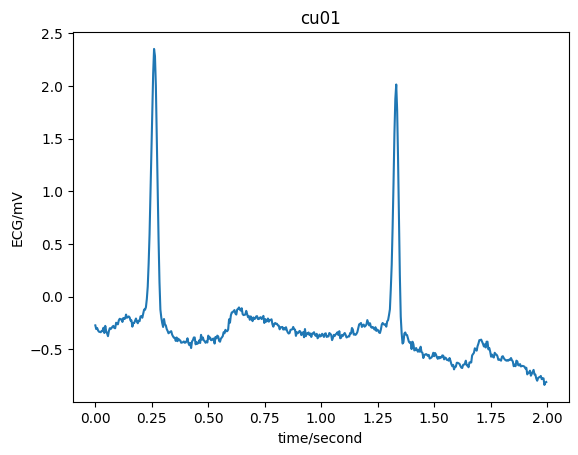

In [4]:
record = wfdb.rdrecord('cu01', sampfrom = 0, sampto = 500, pn_dir='cudb/1.0.0') # сигнал 
wfdb.plot_wfdb(record=record, title = 'cu01') # график 500

In [6]:
display(record.__dict__) # параметры сигнала

{'record_name': 'cu01',
 'n_sig': 1,
 'fs': 250,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 500,
 'base_time': None,
 'base_date': None,
 'comments': [],
 'sig_name': ['ECG'],
 'p_signal': array([[-0.2725],
        [-0.3075],
        [-0.2975],
        [-0.32  ],
        [-0.3325],
        [-0.335 ],
        [-0.3375],
        [-0.325 ],
        [-0.3275],
        [-0.295 ],
        [-0.345 ],
        [-0.2775],
        [-0.3275],
        [-0.3475],
        [-0.375 ],
        [-0.3275],
        [-0.3   ],
        [-0.3075],
        [-0.2975],
        [-0.285 ],
        [-0.2775],
        [-0.2975],
        [-0.3   ],
        [-0.2475],
        [-0.26  ],
        [-0.2625],
        [-0.225 ],
        [-0.21  ],
        [-0.215 ],
        [-0.215 ],
        [-0.24  ],
        [-0.2025],
        [-0.2125],
        [-0.2075],
        [-0.17  ],
        [-0.2   ],
        [-0.195 ],
        [-0.1875],
        [-0.1975],
        [-0.2275],
        [-0.225 ],
        [-0.285 ],

In [7]:
signal,field = wfdb.rdsamp('cu01', pn_dir='cudb/1.0.0/') # полный сигнал подгужаю из базы данных
display(signal) #  сам сигнал
display(field) # параметры

array([[-0.2725],
       [-0.3075],
       [-0.2975],
       ...,
       [ 0.285 ],
       [ 0.3275],
       [ 0.335 ]])

{'fs': 250,
 'sig_len': 127232,
 'n_sig': 1,
 'base_date': None,
 'base_time': None,
 'units': ['mV'],
 'sig_name': ['ECG'],
 'comments': []}

In [8]:
labels = wfdb.show_ann_labels() # это аннотация, N - normal beat

    label_store symbol                                    description
0             0                              Not an actual annotation
1             1      N                                    Normal beat
2             2      L                  Left bundle branch block beat
3             3      R                 Right bundle branch block beat
4             4      a                Aberrated atrial premature beat
5             5      V              Premature ventricular contraction
6             6      F          Fusion of ventricular and normal beat
7             7      J              Nodal (junctional) premature beat
8             8      A                   Atrial premature contraction
9             9      S     Premature or ectopic supraventricular beat
10           10      E                        Ventricular escape beat
11           11      j                 Nodal (junctional) escape beat
12           12      /                                     Paced beat
13           13     

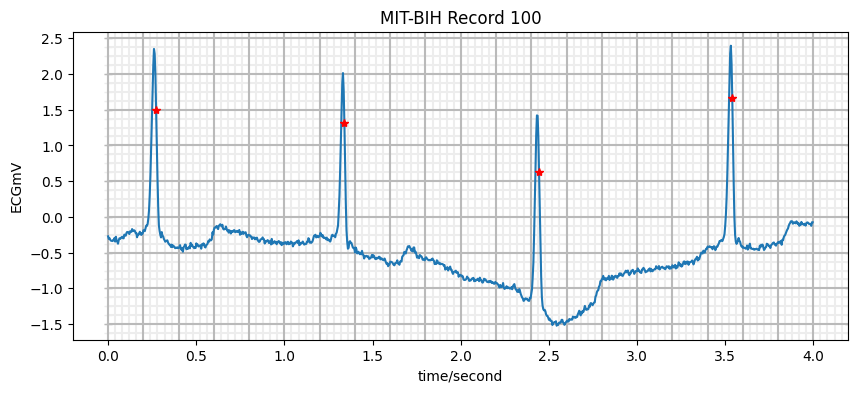

In [9]:
record = wfdb.rdrecord('cu01', sampto = 1000, pn_dir='cudb/1.0.0') # испортируем сигнал первые 4 секунды
ann = wfdb.rdann('cu01', 'atr', sampto=1000, pn_dir='cudb') # читаем к нему аннотацию

wfdb.plot_wfdb(record=record,
                    annotation=ann,
                    title= "первые четыре секунды сигнала с аннотацией", time_units='секунды',
                    figsize=(10,4), ecg_grids = 'all')  

#как видим из графика к каждому пику соотвествует аннотация(пояснение) смотрим 2 ячейки выше там указано
# что для этих 4 пиков аннотация - N (Normal beat)

In [16]:
ann.symbol

['N', 'N', 'N', 'N']

### Разбиваем на 3 секундные интервалы

In [17]:
ann_full = wfdb.rdann('cu01', 'atr', pn_dir='cudb') # аннотация полностью

In [18]:
print('Символы в аннотации к данному сигналу:', set(ann_full.symbol)) 

Символы в аннотации к данному сигналу: {'N', '[', '+', ']'}


In [23]:
cords = ann_full.sample # отсчеты с аннотацией
cords = np.vstack([cords, ann_full.symbol]) # сопоставляем каждому отсчету анатоции ее значение
cords.T # транспонирую

array([['68', 'N'],
       ['335', 'N'],
       ['611', 'N'],
       ['885', 'N'],
       ['1146', 'N'],
       ['1408', 'N'],
       ['1672', 'N'],
       ['1935', 'N'],
       ['2198', 'N'],
       ['2473', 'N'],
       ['2739', 'N'],
       ['3001', 'N'],
       ['3267', 'N'],
       ['3541', 'N'],
       ['3805', 'N'],
       ['4065', 'N'],
       ['4347', 'N'],
       ['4615', 'N'],
       ['4880', 'N'],
       ['5153', 'N'],
       ['5429', 'N'],
       ['5696', 'N'],
       ['5966', 'N'],
       ['6243', 'N'],
       ['6508', 'N'],
       ['6778', 'N'],
       ['7049', 'N'],
       ['7327', 'N'],
       ['7599', 'N'],
       ['7881', 'N'],
       ['8155', 'N'],
       ['8429', 'N'],
       ['8703', 'N'],
       ['8977', 'N'],
       ['9246', 'N'],
       ['9510', 'N'],
       ['9785', 'N'],
       ['10050', 'N'],
       ['10312', 'N'],
       ['10573', 'N'],
       ['10842', 'N'],
       ['11104', 'N'],
       ['11372', 'N'],
       ['11650', 'N'],
       ['11922', 'N'],
       

In [24]:
#как видим из аннотации фибриляция начинается с 53546 отсчета, до есть можнем разделить сигнал на условно до после
split_sample = ann_full.sample[cords.T[:,1] == '+']
split_sample

array([53541])

In [27]:
#Частота 250 тогда 3 секунды это 3*250=750 отсчетов
fs=250
t = 3 
print(signal.shape)
# применяем модуль к сигналу
signal = np.absolute(signal)  
integer_shape = signal.shape[0]//(t*fs)*t*fs # ищем последнее кратное 750 число отсчетов
signal = signal[:integer_shape]
signal_3 = signal.reshape([signal.shape[0]//(t*fs), t*fs])
print('Количество интервалов по 3 секунды', len(signal_3), "Число отсчетов в интервале", signal_3[0].shape)

(126750, 1)
Количество интервалов по 3 секунды 169 Число отсчетов в интервале (750,)


In [30]:
signal_3

array([[0.2725, 0.3075, 0.2975, ..., 0.775 , 0.7575, 0.7625],
       [0.7575, 0.72  , 0.7525, ..., 0.0125, 0.025 , 0.01  ],
       [0.    , 0.0025, 0.0125, ..., 0.31  , 0.3025, 0.3225],
       ...,
       [0.095 , 0.0475, 0.0725, ..., 0.645 , 0.7325, 0.8   ],
       [0.885 , 0.9325, 0.99  , ..., 0.2875, 0.3   , 0.2575],
       [0.2   , 0.1625, 0.0975, ..., 0.2075, 0.12  , 0.0825]])

In [31]:
signal_3.shape

(169, 750)

In [44]:
len(signal_3[0])

750

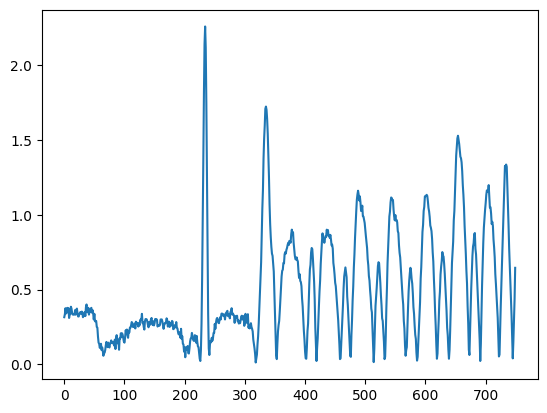

In [73]:
#теперь выделим пересечения порога 0.7 от пика
plt.plot( signal_3[71]) # график с фибрилляцией

In [51]:
def count_crossing(interval):
    target = 0.7*max(interval) # порог считаем
    target_mask = interval > target
    count_cross = 0 # количество пересечений
    time_cross = 0 # время пересечия
    for i,el in enumerate(target_mask):
      if i == 0:
        continue
      if el != target_mask[i-1]:
        count_cross += 1
    time_cross = len(interval[interval > target])
    return count_cross, time_cross/fs
    
  
count_crossing(signal_3[0])

(4, 0.032)

In [77]:
def paste_annotation(row, spliter): #row - строка датафрейма, spliter- отсчет после которого начинается шоковый ритм или + по аннотации
  start = row['Start']
  end = row['End']
  if spliter in range(start, end):
    return '+'
  elif spliter < start:
    return 'S' # шоковый ритм
  elif spliter > end:
    return "N" # еще нормальный ритм
  else:
    print('Error')

In [99]:
# создаю таблицку как на доске
df = pd.DataFrame({
    "Nint": range(signal_3.shape[0]), # номер интервала порядковый
    "SigName": "cu01", # имя сигнала
    "Amp_max": np.max(signal_3, axis=1), # максимальная амплитуда на промежутке
    
})

df['Start'] = df['Nint'].apply(lambda x: t*fs*x) 
df['End'] = df['Nint'].apply(lambda x: t*fs*x+ t*fs-1)

df['P'] = df['Nint'].apply(lambda x: count_crossing(signal_3[x]))
df[['P1', 'P2']] = pd.DataFrame(df['P'].tolist(), index= df['P'].index) # разделяем P на два параметра P1, P2(путем создания из P двух колонок датафрема)
df['P2%'] = round(df['P2']/3, 4)
df = df.drop(columns = 'P') # убираем столбец P потому что он нам больше не нужен
df

,Nint,SigName,Amp_max,Start,End,P1,P2,P2%
0,0,cu01,2.3500,0,749,4,0.032,0.0107
1,1,cu01,2.5650,750,1499,6,0.052,0.0173
2,2,cu01,2.5000,1500,2249,6,0.064,0.0213
3,3,cu01,2.4575,2250,2999,5,0.040,0.0133
4,4,cu01,2.3475,3000,3749,5,0.044,0.0147
...,...,...,...,...,...,...,...,...
164,164,cu01,1.5100,123000,123749,6,0.068,0.0227
165,165,cu01,1.0850,123750,124499,20,0.280,0.0933
166,166,cu01,1.2875,124500,125249,14,0.216,0.0720
167,167,cu01,1.2250,125250,125999,15,0.292,0.0973


In [100]:
df['Ann'] = df.apply(lambda x: paste_annotation(x, split_sample), axis = 1) #добавляю аннотацию(пояснение)
df = df[df['Ann'] != '+'] # убираем интервал с +, там где вместе нормальный и шоковый ритм
df

,Nint,SigName,Amp_max,Start,End,P1,P2,P2%,Ann
0,0,cu01,2.3500,0,749,4,0.032,0.0107,N
1,1,cu01,2.5650,750,1499,6,0.052,0.0173,N
2,2,cu01,2.5000,1500,2249,6,0.064,0.0213,N
3,3,cu01,2.4575,2250,2999,5,0.040,0.0133,N
4,4,cu01,2.3475,3000,3749,5,0.044,0.0147,N
...,...,...,...,...,...,...,...,...,...
164,164,cu01,1.5100,123000,123749,6,0.068,0.0227,S
165,165,cu01,1.0850,123750,124499,20,0.280,0.0933,S
166,166,cu01,1.2875,124500,125249,14,0.216,0.0720,S
167,167,cu01,1.2250,125250,125999,15,0.292,0.0973,S


In [80]:
df.groupby('Ann').agg({"Ann" : "count"}) # группируем по колонке Ann и считаем количество строк для N и S

,Ann
Ann,
N,71
S,97


Строим результаты на пространстве параметров


/tmp/ipykernel_154804/93939770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Col_Ann'] = df['Ann']
/tmp/ipykernel_154804/93939770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Col_Ann'] = df['Col_Ann'].replace(['N', 'S'],['blue', 'red']) # задаю цвет точек


(0.0, 20.0)

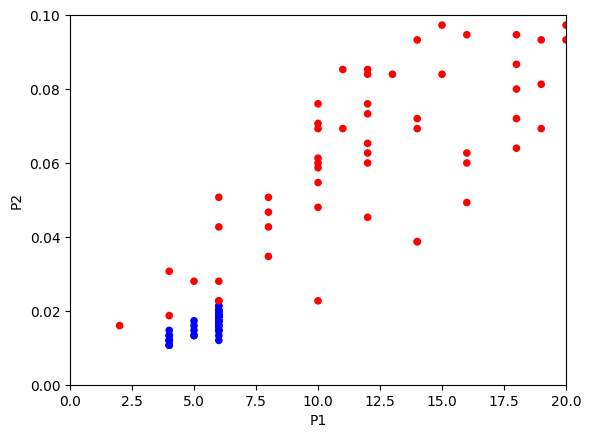

In [102]:
df['Col_Ann'] = df['Ann']
df['Col_Ann'] = df['Col_Ann'].replace(['N', 'S'],['blue', 'red']) # задаю цвет точек
df.plot.scatter(x='P1', y='P2%', c = 'Col_Ann')
plt.xlabel("P1")
plt.ylabel("P2")
plt.ylim(0, 0.1)
plt.xlim(0, 20)

In [109]:
from sklearn.linear_model import LogisticRegression #sklearn- библиотека для машинного обучения
from sklearn.model_selection import train_test_split

X = df[['P1', 'P2']]
y = df['Ann'].replace(['N', 'S'],['0', '1']) # 1- есть шоковый ритм 0- нет шокового ритма

#train_test_split делит данные на обучющую и тестовую выборки 70 и 30 процентов соотв.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train) # fit обчает нашу модель на тестовых данных

LogisticRegression()

In [110]:
y_pred = logreg.predict(X_test) # заставляем модель предсказать y
print('Accuracy:', (y_pred == y_test).sum() / len(y_test)) # точность предсказания модели

Accuracy: 0.9411764705882353


In [ ]:
# Получили точность 94% 